In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from skimage import color
from skimage.io import imread, imshow, imsave
from information import ITPC
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

%matplotlib inline

Iteration  1
1625
Iteration  2
48
Iteration  3
10
Iteration  4
1
Iteration  5
0


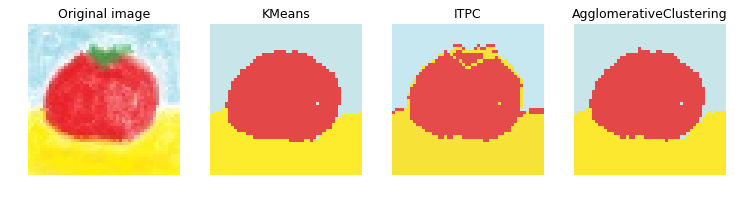

In [3]:
url = 'https://pp.userapi.com/c855232/v855232641/9a9c/vhidXRMEziw.jpg'
im = imread(url)

N_clus = 3
X = np.reshape(im, (im.shape[0]*im.shape[1], im.shape[2]))

fig, axes = plt.subplots(
    ncols=4,
    nrows=1, figsize=(12, 5),
    dpi=75
)

axes[0].imshow(im)
axes[0].set_title('Original image')
axes[0].axis('off')
    
cl_1 =  KMeans(n_clusters = N_clus)  
cl_1.fit(X) 
labels = np.reshape(cl_1.labels_, im.shape[0:2])
out1 = color.label2rgb(labels, im, kind='avg')

axes[1].imshow(out1)
axes[1].set_title('KMeans')
axes[1].axis('off')
      
cl_2 = ITPC(n_clusters = N_clus, gamma=0.005, random_state=6)
cl_2.fit(X) 
labels = np.reshape(cl_2.labels_, im.shape[0:2])
out2 = color.label2rgb(labels, im, kind='avg')

axes[2].imshow(out2)
axes[2].set_title('ITPC')
axes[2].axis('off')

cl_3 = AgglomerativeClustering(n_clusters = N_clus)   
cl_3.fit(X) 
labels = np.reshape(cl_3.labels_, im.shape[0:2])
out3 = color.label2rgb(labels, im, kind='avg')

axes[3].imshow(out3)
axes[3].set_title('AgglomerativeClustering')
axes[3].axis('off')


plt.show()


Iteration  1
1237
Iteration  2
76
Iteration  3
20
Iteration  4
5
Iteration  5
8
Iteration  6
8
Iteration  7
0
Iteration  1
1625
Iteration  2
48
Iteration  3
10
Iteration  4
1
Iteration  5
0
Iteration  1
1825
Iteration  2
138
Iteration  3


C:\Users\alkim_000\Downloads\information.py:239: RuntimeWarning: invalid value encountered in log2
  P_log_1 = np.log2(P_log_1)
C:\Users\alkim_000\Downloads\information.py:247: RuntimeWarning: invalid value encountered in log2
  P_log_2 = np.log2(P_log_2)


40
Iteration  4
8
Iteration  5
7
Iteration  6
0
Iteration  1
1926
Iteration  2


C:\Users\alkim_000\Downloads\information.py:239: RuntimeWarning: invalid value encountered in log2
  P_log_1 = np.log2(P_log_1)
C:\Users\alkim_000\Downloads\information.py:247: RuntimeWarning: invalid value encountered in log2
  P_log_2 = np.log2(P_log_2)


180
Iteration  3
94
Iteration  4
39
Iteration  5
14
Iteration  6
3
Iteration  7
4
Iteration  8
1
Iteration  9
0
Iteration  1
2006
Iteration  2


C:\Users\alkim_000\Downloads\information.py:239: RuntimeWarning: invalid value encountered in log2
  P_log_1 = np.log2(P_log_1)
C:\Users\alkim_000\Downloads\information.py:247: RuntimeWarning: invalid value encountered in log2
  P_log_2 = np.log2(P_log_2)


202
Iteration  3
81
Iteration  4
39
Iteration  5
56
Iteration  6
37
Iteration  7
44
Iteration  8
52
Iteration  9
49
Iteration  10
19
Iteration  11
11
Iteration  12
7
Iteration  13
6
Iteration  14
0


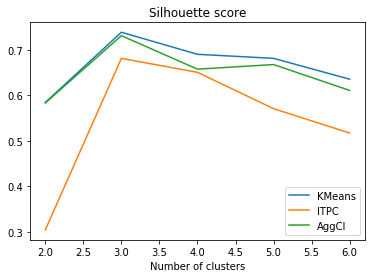

In [19]:
scores = np.zeros((3, 5))
url = 'https://pp.userapi.com/c855232/v855232641/9a9c/vhidXRMEziw.jpg'
im = imread(url)
X = np.reshape(im, (im.shape[0]*im.shape[1], im.shape[2]))

for n in range(2, 7):
    cl_1 =  KMeans(n_clusters = n)  
    cl_1.fit(X)

    cl_2 = ITPC(n_clusters = n, gamma=0.005, random_state=6)
    cl_2.fit(X) 
    
    cl_3 = AgglomerativeClustering(n_clusters = n)   
    cl_3.fit(X) 
    
    score[0, n-2] = silhouette_score(X, cl_1.labels_)
    score[1, n-2] = silhouette_score(X, cl_2.labels_)
    score[2, n-2] = silhouette_score(X, cl_3.labels_)


plt.plot(list(range(2,7)), score[0,:], label='KMeans')
plt.plot(list(range(2,7)), score[1,:], label='ITPC')
plt.plot(list(range(2,7)), score[2,:], label='AggCl')
plt.xlabel('Number of clusters')
plt.title('Silhouette score')
plt.legend()
plt.show()

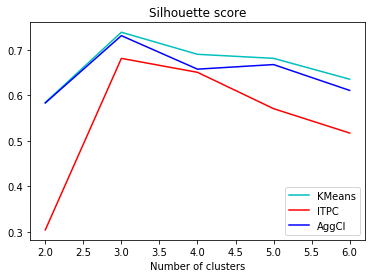

In [36]:
plt.plot(list(range(2,7)), score[0,:], label='KMeans', color='c')
plt.plot(list(range(2,7)), score[1,:], label='ITPC', color='r')
plt.plot(list(range(2,7)), score[2,:], label='AggCl', color='b')
plt.xlabel('Number of clusters')
plt.title('Silhouette score')
plt.legend()
plt.show()